In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler

In [3]:
df = pd.read_csv("./Bengaluru_House_Data.csv")
df = pd.DataFrame(df)
df.head(50)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


In [4]:
print(df.isnull().sum())
print(df.shape)
print(df.describe())

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64
(13320, 9)
               bath       balcony         price
count  13247.000000  12711.000000  13320.000000
mean       2.692610      1.584376    112.565627
std        1.341458      0.817263    148.971674
min        1.000000      0.000000      8.000000
25%        2.000000      1.000000     50.000000
50%        2.000000      2.000000     72.000000
75%        3.000000      2.000000    120.000000
max       40.000000      3.000000   3600.000000


In [5]:
print(df["location"].value_counts())
#pd.set_option("display.max_rows", None)  # show all rows
#print(df["location"].value_counts())
#pd.reset_option("display.max_rows")      # reset back
#

location
Whitefield                         540
Sarjapur  Road                     399
Electronic City                    302
Kanakpura Road                     273
Thanisandra                        234
                                  ... 
3rd Stage Raja Rajeshwari Nagar      1
Chuchangatta Colony                  1
Electronic City Phase 1,             1
Chikbasavanapura                     1
Abshot Layout                        1
Name: count, Length: 1305, dtype: int64


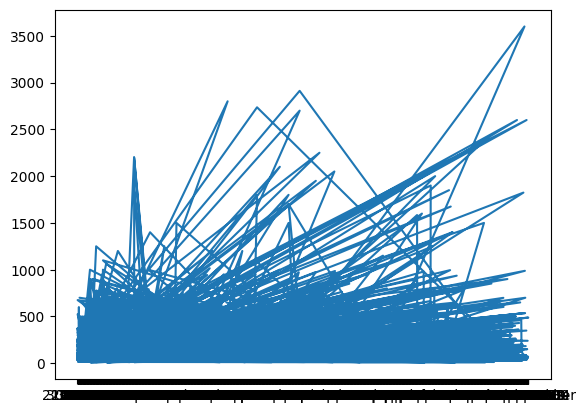

In [12]:
plt.plot(df["total_sqft"],df["price"])
plt.show()

In [6]:
df["location"] = df["location"].astype(str).str.lower().str.strip()

import re

def clean_location(loc):
    loc = str(loc).lower().strip()

    if "whitefield" in loc:
        return "whitefield"
    elif "electronic" in loc:
        return "electronic city"
    elif "sarjapur" in loc:
        return "sarjapur road"
    elif "jp nagar" in loc:
        return "jp nagar"
    elif "marathahalli" in loc:
        return "marathahalli"
    elif "hebbal" in loc:
        return "hebbal"
    elif "bannerghatta" in loc:
        return "bannerghatta road"
    elif "rajaji" in loc:
        return "rajajinagar"
    else:
        return loc

df["location_cleaned"] = df["location"].apply(clean_location)


In [7]:
df.head()
df1 = df.copy()
df1 = df1.drop(["area_type","availability","society","location"], axis=1)
df1.head()
print(df1.shape)
print(df1.isnull().sum())

(13320, 6)
size                 16
total_sqft            0
bath                 73
balcony             609
price                 0
location_cleaned      0
dtype: int64


In [8]:
# Bath → fill with per-location mean (rounded), fallback to global mean
df1["bath"] = df1.groupby("location_cleaned")["bath"].transform(
    lambda x: x.fillna((x.mean()))
).fillna(round(df1["bath"].mean()))

df1["bath"] = df1["bath"].astype(int)

# Balcony → same logic
df1["balcony"] = df1.groupby("location_cleaned")["balcony"].transform(
    lambda x: x.fillna((x.mean()))
).fillna(round(df1["balcony"].mean()))

df1["balcony"] = df1["balcony"].astype(int)


In [26]:
print(df1.isnull().sum())

size                16
total_sqft           0
bath                 0
balcony              0
price                0
location_cleaned     0
dtype: int64


In [9]:
loc_counts = df1["location_cleaned"].value_counts()
rare_locs = loc_counts[loc_counts < 50].index
df1["location_cleaned"] = df1["location_cleaned"].replace(rare_locs, "other")


In [20]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# ---- 1. Clean up ----
# Extract BHK from "size"
df1["size_cleared"] = df1["size"].str.extract(r'(\d+)').astype(float)

# Clean "total_sqft" (convert ranges to average)
def convert_sqft(x):
    try:
        if '-' in str(x):  # e.g. "1200-1500"
            tokens = x.split('-')
            return (float(tokens[0]) + float(tokens[1])) / 2
        return float(x)
    except:
        return None

df1["total_sqft"] = df1["total_sqft"].apply(convert_sqft)

# Drop rows with missing target (price)
df1 = df1.dropna(subset=["price"])

# ---- 2. Separate features and target ----
X = df1[["total_sqft", "bath", "balcony", "size_cleared", "location_cleaned"]]
y = df1["price"]

# ---- 3. Preprocess ----
# Numeric and categorical features
numeric_features = ["total_sqft", "bath", "balcony", "size_cleared"]
categorical_features = ["location_cleaned"]

# Transformer: scale numeric, one-hot encode categorical
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ])

# ---- 4. Example pipeline ----
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor)
])

# Transform the dataset
X_processed = pipeline.fit_transform(X)

print("Shape before:", X.shape)
print("Shape after:", X_processed.shape)


Shape before: (13320, 5)
Shape after: (13320, 56)


In [11]:
X_processed = pd.DataFrame(X_processed)
X_processed.head()

,0
0,<Compressed Sparse Row sparse matrix of dtype ...
1,<Compressed Sparse Row sparse matrix of dtype ...
2,<Compressed Sparse Row sparse matrix of dtype ...
3,<Compressed Sparse Row sparse matrix of dtype ...
4,<Compressed Sparse Row sparse matrix of dtype ...


In [12]:
!pip install xgboost

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as LR
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.ensemble import RandomForestRegressor as RFR
from xgboost import XGBRegressor as XR
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, r2_score



In [31]:
import numpy as np

print(np.isnan(X_processed.data).sum())  # For sparse matrix, check non-zero elements


62


In [33]:
from sklearn.impute import SimpleImputer

# Create imputer to replace NaNs with column mean
imputer = SimpleImputer(strategy='mean')

# If X_processed is sparse
X_filled = imputer.fit_transform(X_processed)  # returns dense by default


In [34]:
X_filled = imputer.fit_transform(X_processed.toarray())

In [35]:
X_dense = X_processed.toarray()    #for linear regression

In [36]:
lr = LR()
dtr = DTR()
rfr = RFR()
xr = XR()

m1 = lr.fit(X_dense, y)
m2 = dtr.fit(X_filled, y)
m3 = rfr.fit(X_filled, y)
m4 = xr.fit(X_filled, y)


accuracy = []

for m in [m2,m3,m4]:
    y_pred = m.predict(X_processed)
    accuracy.append(r2_score(y,y_pred))

print(accuracy)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

# Assuming X_processed is your sparse matrix
X_dense = X_processed.toarray()  # Only needed for Linear Regression

# Initialize models
lr = LinearRegression()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor()
xr = XGBRegressor()

# Fit models
lr.fit(X_dense, y)           # Linear Regression requires dense matrix
dtr.fit(X_processed, y)      # Tree-based models can handle sparse matrices in some cases
rfr.fit(X_processed, y)
xr.fit(X_processed, y)

# Evaluate models
accuracy = []
models = [lr, dtr, rfr, xr]

for m in models:
    # Use dense for Linear Regression, sparse for others
    if isinstance(m, LinearRegression):
        y_pred = m.predict(X_dense)
    else:
        y_pred = m.predict(X_processed)
    accuracy.append(r2_score(y, y_pred))

print(accuracy)


ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [37]:
X_dense = X_processed.toarray()  # now it’s dense, NaNs are preserved


In [38]:
import numpy as np
print(np.isnan(X_dense).sum())  # should be 62, like you saw


62


In [39]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_dense_filled = imputer.fit_transform(X_dense)  # replaces all NaNs with column mean


In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

x_train, x_test, y_train, y_test = train_test_split(X_dense_filled, y, test_size=0.2,)


# Initialize
lr = LinearRegression()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor()
xr = XGBRegressor()

# Fit models
lr.fit(X_dense_filled, y)
dtr.fit(X_dense_filled, y)
rfr.fit(X_dense_filled, y)
xr.fit(X_dense_filled, y)

# Evaluate
accuracy = []
for m in [lr, dtr, rfr, xr]:
    y_pred = m.predict(X_dense_filled)
    accuracy.append(r2_score(y, y_pred))

print(accuracy)


[0.4199041357256592, 0.9597079193025531, 0.9008094478905884, 0.828079696643527]


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

x_train, x_test, y_train, y_test = train_test_split(X_dense_filled, y, test_size=0.2,)


# Initialize
lr = LinearRegression()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor()
xr = XGBRegressor()

# Fit models
lr.fit(x_train, y_train)
dtr.fit(x_train, y_train)
rfr.fit(x_train, y_train)
xr.fit(x_train, y_train)

# Evaluate
accuracy_1 = []
for m in [lr, dtr, rfr, xr]:
    y_pred = m.predict(X_dense_filled)
    accuracy_1.append(r2_score(y, y_pred))

print(accuracy)


In [52]:
import random

x_ran = random.randint(1,len(X_dense_filled) - 1)
x_test = X_dense_filled[x_ran].reshape(1, -1)

test = dtr.predict(x_test)
print(test)
print(y[x_ran])


[103.41666667]
103.0


In [53]:
import pickle

In [54]:
# Save Linear Regression
with open("linear_regression.pkl", "wb") as f:
    pickle.dump(lr, f)

# Save Decision Tree Regressor
with open("decision_tree.pkl", "wb") as f:
    pickle.dump(dtr, f)

# Save Random Forest Regressor
with open("random_forest.pkl", "wb") as f:
    pickle.dump(rfr, f)

# Save XGBoost Regressor
with open("xgboost.pkl", "wb") as f:
    pickle.dump(xr, f)
